# 입문자를 위한, 파이썬/R 데이터 분석

]

## Today's mission

- 경진대회 실습 프로젝트 소개
- 실습 : 구내식당 식수 인원 예측 AI 경진대회
- GridSearchCV (하이퍼 파라미터 학습과 최적화)

]

## 구내식당 식수 인원 예측 AI 경진대회
정형 | 한국토지주택공사 | 식수예측 | MAE

https://dacon.io/competitions/official/235743/overview/description

In [1]:
# 1) Import package
# 2) Data loading
# 3) Preprocessing
# 4) Modeling
# 5) Evaluation
# 6) Report / Submission

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv("data_dacon/train.csv", parse_dates=['일자'])
test = pd.read_csv("data_dacon/test.csv", parse_dates=['일자'])
submission = pd.read_csv("data_dacon/sample_submission.csv")

In [4]:
print(train.shape)
train.head()

(1205, 12)


,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0


In [5]:
print(test.shape)
test.head()

(50, 10)


,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치
1,2021-01-28,목,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지
2,2021-01-29,금,2983,270,249,0,294.0,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치
3,2021-02-01,월,2924,108,154,538,322.0,모닝롤/촉촉한치즈케익 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 두부김칫국 새우완...,쌀밥/흑미밥/찰현미밥 배추들깨국 오리대패불고기 시금치프리타타 부추고추장무침 포기김치...,흑미밥 동태탕 돈육꽈리고추장조림 당면채소무침 모자반무침 포기김치
4,2021-02-02,화,2924,62,186,455,314.0,모닝롤/토마토샌드 우유/주스 계란후라이/찐계란 채소죽/흑미밥 호박맑은국 오이생채 양...,쌀밥/팥밥/찰현미밥 부대찌개 닭살데리야끼조림 버섯탕수 세발나물무침 알타리김치/사과푸...,흑미밥 바지락살국 쇠고기청경채볶음 두부구이*볶은김치 머위된장무침 백김치


In [6]:
print(submission.shape)
submission.head()

(50, 3)


,일자,중식계,석식계
0,2021-01-27,0,0
1,2021-01-28,0,0
2,2021-01-29,0,0
3,2021-02-01,0,0
4,2021-02-02,0,0


In [7]:
1 + train['본사시간외근무명령서승인건수'] / train['본사정원수'] 

0       1.091503
1       1.122645
2       1.042676
3       1.136486
4       1.013072
          ...   
1200    1.001341
1201    1.154878
1202    1.000335
1203    1.206504
1204    1.184713
Length: 1205, dtype: float64

In [8]:
train['hcount'] = train['본사정원수'] - train['본사휴가자수'] - train['본사출장자수'] - train['현본사소속재택근무자수']
train['hcount'] = train['hcount'] * (1 + train['본사시간외근무명령서승인건수'] / train['본사정원수'])

In [9]:
train.head(3)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,hcount
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2620.699346
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2669.650135
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2465.928489


In [10]:
train.isnull().sum()

일자                0
요일                0
본사정원수             0
본사휴가자수            0
본사출장자수            0
본사시간외근무명령서승인건수    0
현본사소속재택근무자수       0
조식메뉴              0
중식메뉴              0
석식메뉴              0
중식계               0
석식계               0
hcount            0
dtype: int64

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   일자              1205 non-null   datetime64[ns]
 1   요일              1205 non-null   object        
 2   본사정원수           1205 non-null   int64         
 3   본사휴가자수          1205 non-null   int64         
 4   본사출장자수          1205 non-null   int64         
 5   본사시간외근무명령서승인건수  1205 non-null   int64         
 6   현본사소속재택근무자수     1205 non-null   float64       
 7   조식메뉴            1205 non-null   object        
 8   중식메뉴            1205 non-null   object        
 9   석식메뉴            1205 non-null   object        
 10  중식계             1205 non-null   float64       
 11  석식계             1205 non-null   float64       
 12  hcount          1205 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(4), object(4)
memory usage: 122.5+ KB


In [12]:
train['year'] = train['일자'].dt.year
train['month'] = train['일자'].dt.month
train['day'] = train['일자'].dt.day
train['dayofweek'] = train['일자'].dt.dayofweek

train.head(1)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,hcount,year,month,day,dayofweek
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2620.699346,2016,2,1,0


In [13]:
test['year'] = test['일자'].dt.year
test['month'] = test['일자'].dt.month
test['day'] = test['일자'].dt.day
test['dayofweek'] = test['일자'].dt.dayofweek

test['hcount'] = test['본사정원수'] - test['본사휴가자수'] - test['본사출장자수'] - test['현본사소속재택근무자수']
test['hcount'] = test['hcount'] * (1 + test['본사시간외근무명령서승인건수'] / test['본사정원수'])
test.head(1)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,year,month,day,dayofweek,hcount
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치,2021,1,27,2,2358.947368


In [14]:
plt.rc('font',family="Malgun Gothic")

In [15]:
# 사용자 운영체제 확인
import os
os.name

# 운영체제별 한글 폰트 설정
if os.name == 'posix': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

<AxesSubplot:xlabel='hcount', ylabel='중식계'>

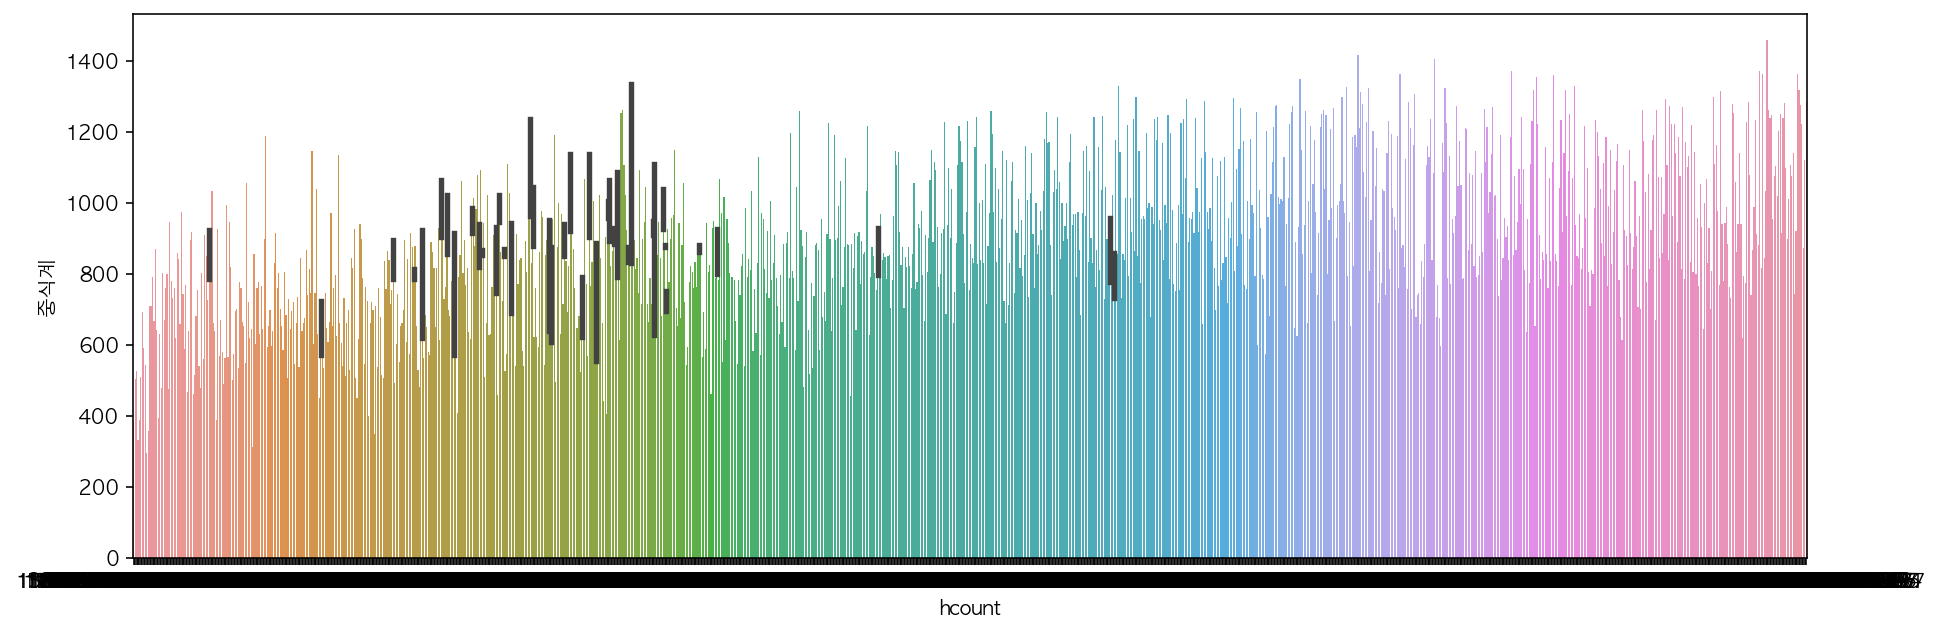

In [16]:
fig=plt.figure(figsize=(15,5))
sns.barplot(data=train, x='hcount', y='중식계')

<AxesSubplot:xlabel='hcount', ylabel='석식계'>

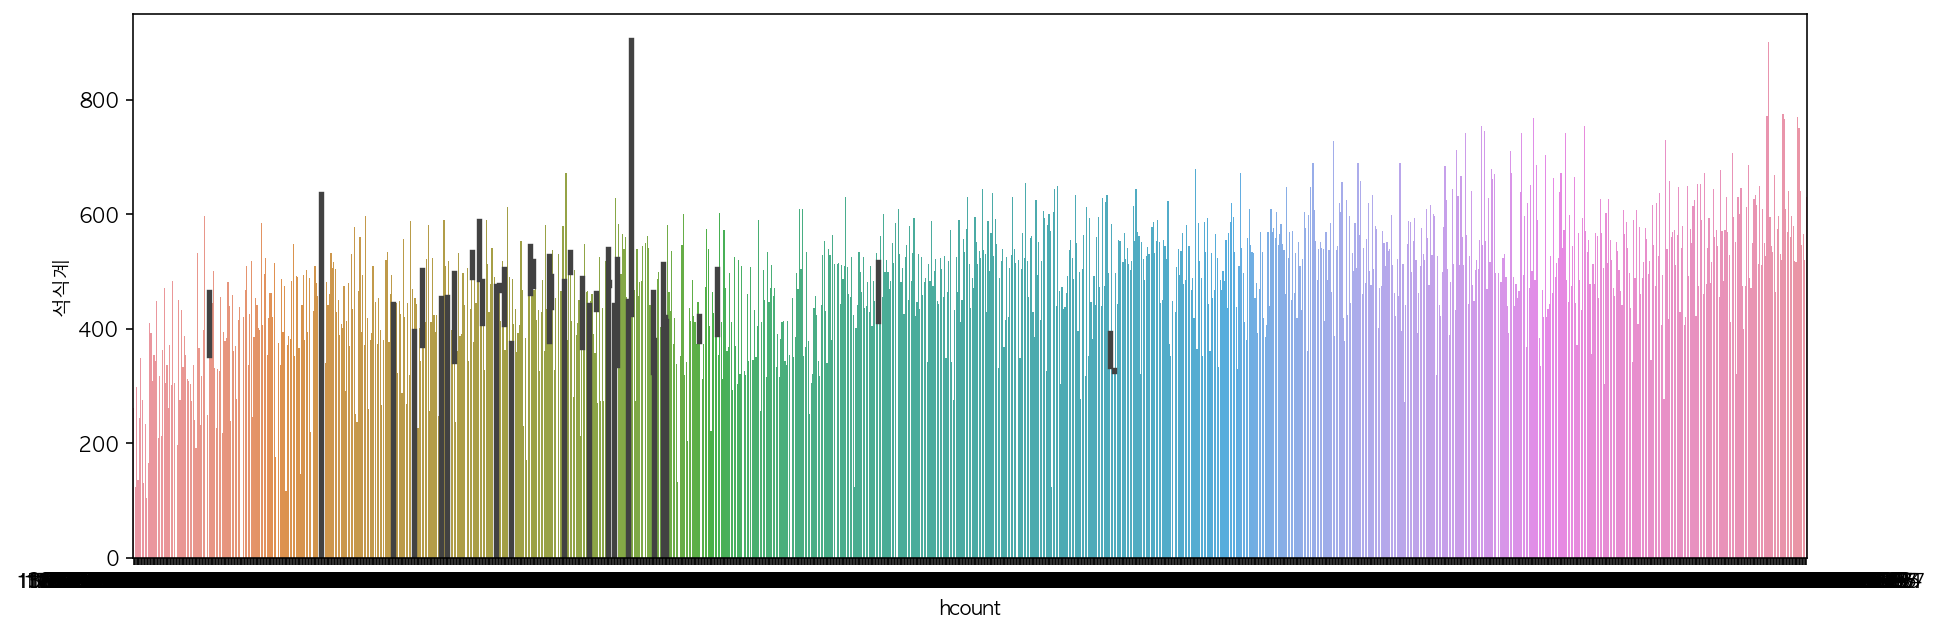

In [17]:
fig=plt.figure(figsize=(15,5))
sns.barplot(data=train, x='hcount', y='석식계')

<AxesSubplot:xlabel='dayofweek', ylabel='석식계'>

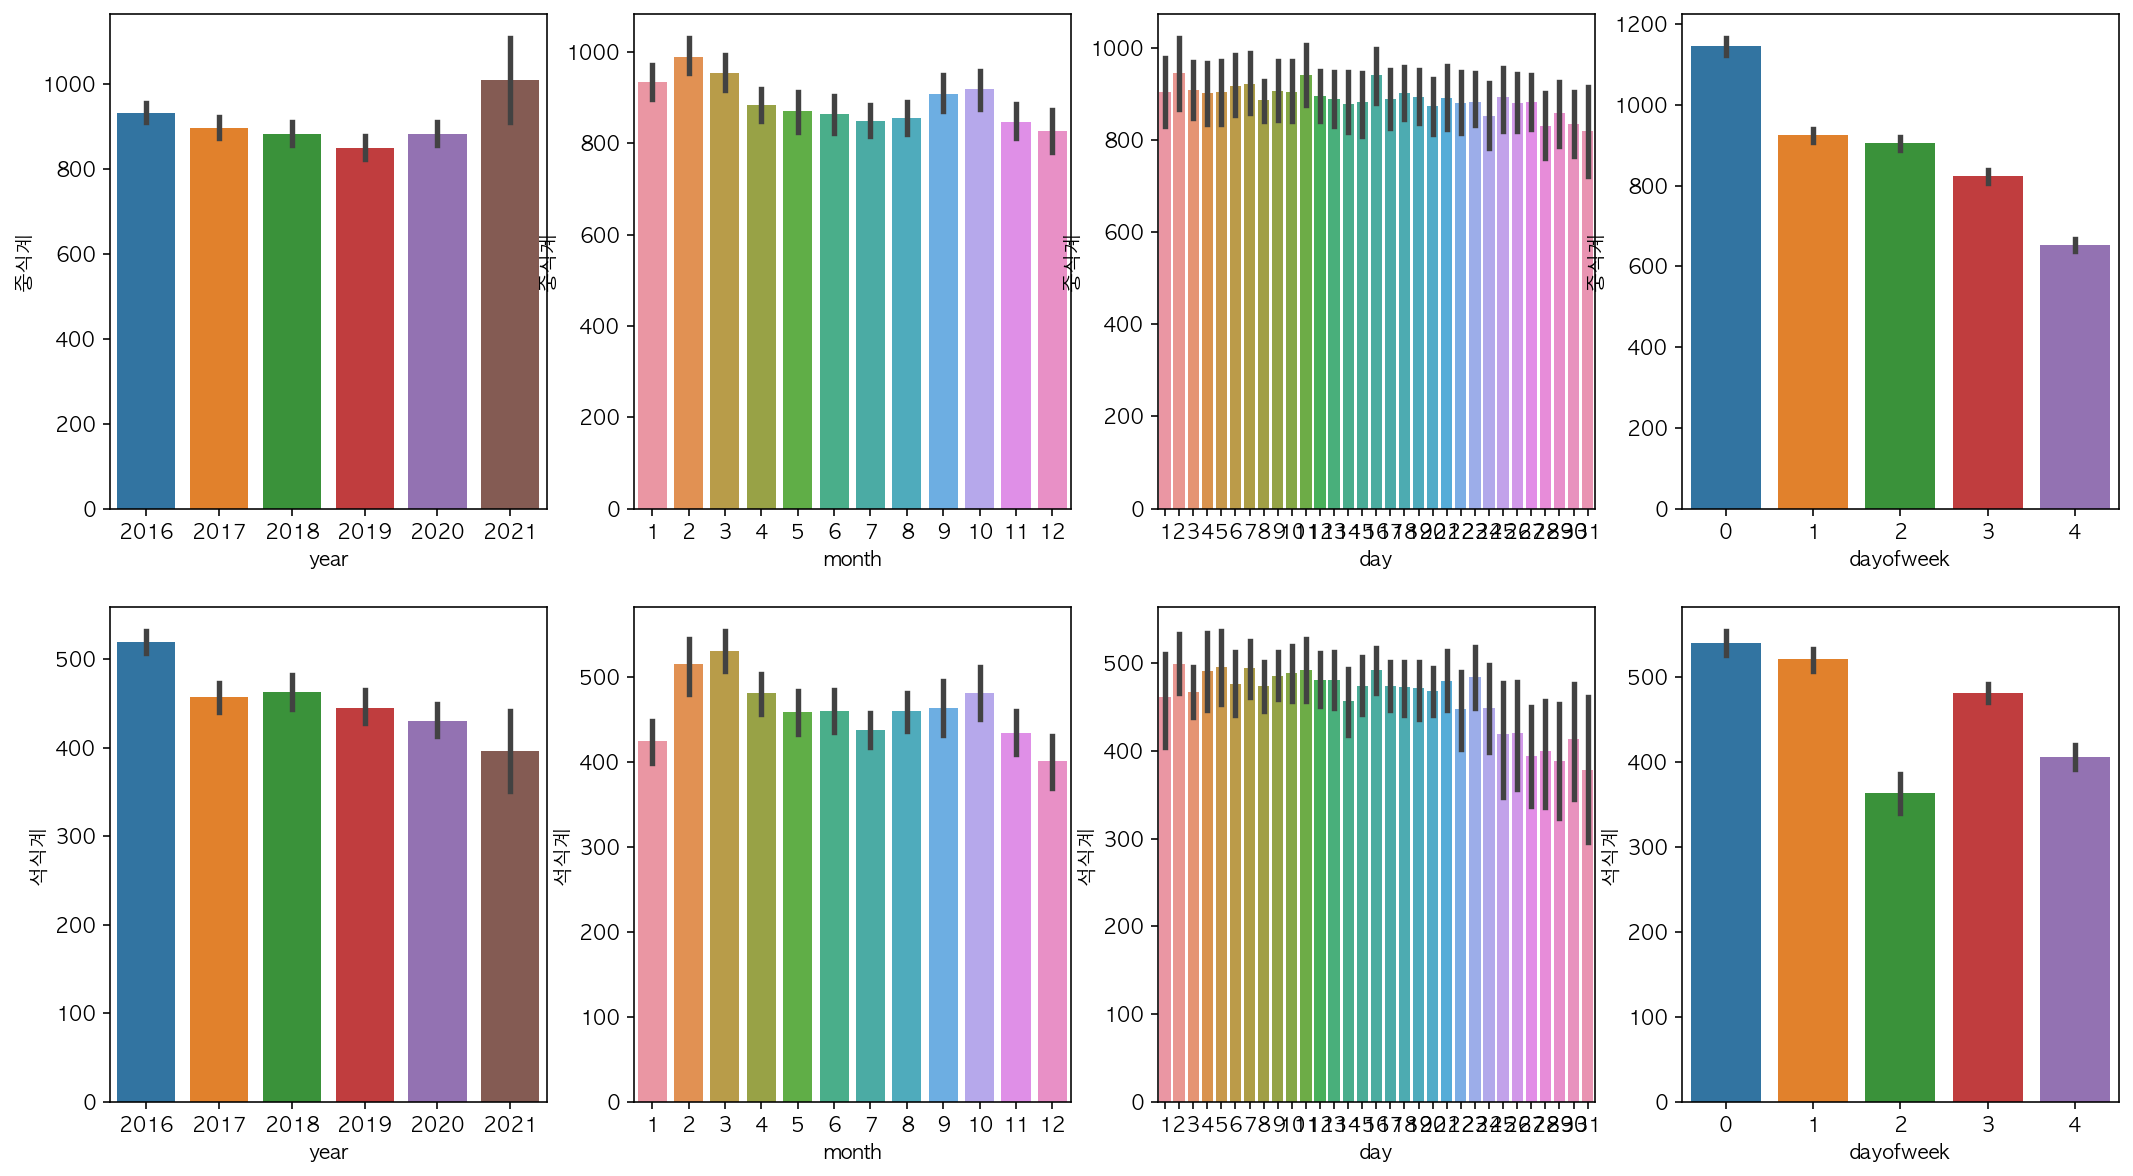

In [18]:
figure, ( (a1, a2, a3, a4), (a5, a6, a7, a8) )= plt.subplots(nrows=2 , ncols=4)

figure.set_size_inches(18, 10)

sns.barplot(data=train, x='year', y='중식계', ax=a1)
sns.barplot(data=train, x='month', y='중식계', ax=a2)
sns.barplot(data=train, x='day', y='중식계', ax=a3)
sns.barplot(data=train, x='dayofweek', y='중식계', ax=a4)

sns.barplot(data=train, x='year', y='석식계', ax=a5)
sns.barplot(data=train, x='month', y='석식계', ax=a6)
sns.barplot(data=train, x='day', y='석식계', ax=a7)
sns.barplot(data=train, x='dayofweek', y='석식계', ax=a8)

In [21]:
train.corr()

,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,hcount,year,month,day,dayofweek
본사정원수,1.000000,0.244666,-0.061688,0.146544,0.452293,-0.115529,-0.173852,0.360442,0.764078,0.244705,-0.020737,-0.009671
본사휴가자수,0.244666,1.000000,-0.273318,-0.230789,0.065397,-0.391975,-0.316894,-0.480456,0.129875,0.193627,-0.009210,0.155939
본사출장자수,-0.061688,-0.273318,1.000000,-0.308757,-0.352643,-0.512680,-0.188164,-0.117233,-0.109583,0.210877,0.144007,0.535655
본사시간외근무명령서승인건수,0.146544,-0.230789,-0.308757,1.000000,0.156792,0.535611,0.571168,0.833146,0.181749,0.018316,-0.093606,-0.556452
현본사소속재택근무자수,0.452293,0.065397,-0.352643,0.156792,1.000000,0.076509,-0.057534,-0.016240,0.571133,0.033586,-0.031583,-0.027724
중식계,-0.115529,-0.391975,-0.512680,0.535611,0.076509,1.000000,0.508287,0.520851,-0.078804,-0.154664,-0.097392,-0.734273
석식계,-0.173852,-0.316894,-0.188164,0.571168,-0.057534,0.508287,1.000000,0.481859,-0.194792,-0.127142,-0.185565,-0.313240
hcount,0.360442,-0.480456,-0.117233,0.833146,-0.016240,0.520851,0.481859,1.000000,0.272904,0.006076,-0.079722,-0.512962
year,0.764078,0.129875,-0.109583,0.181749,0.571133,-0.078804,-0.194792,0.272904,1.000000,-0.092612,-0.029843,-0.010811
month,0.244705,0.193627,0.210877,0.018316,0.033586,-0.154664,-0.127142,0.006076,-0.092612,1.000000,0.002120,0.002192


In [22]:
train.head(2)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,hcount,year,month,day,dayofweek
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2620.699346,2016,2,1,0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2669.650135,2016,2,2,1


In [23]:
train.columns

Index(['일자', '요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수', '조식메뉴', '중식메뉴', '석식메뉴', '중식계', '석식계', 'hcount', 'year',
       'month', 'day', 'dayofweek'],
      dtype='object')

In [24]:
feature_cols_1 = ['본사휴가자수','본사출장자수','본사시간외근무명령서승인건수','dayofweek', 'hcount']
feature_cols_2 = ['본사휴가자수','본사시간외근무명령서승인건수','dayofweek', 'hcount']

In [25]:
X_train_1 = train[feature_cols_1]
y_train_1 = train['중식계']

In [26]:
X_train_2 = train[feature_cols_2]
y_train_2 = train['석식계']

In [27]:
X_test_1 = test[feature_cols_1]
X_test_2 = test[feature_cols_2]

In [28]:
# 모델링
from sklearn.ensemble import RandomForestRegressor # 분류 모형이지만 회귀 모형에서 사용할 수 있게 만든것
from sklearn.model_selection import cross_val_score

In [29]:
rf_reg_1 = RandomForestRegressor(n_jobs=-1, n_estimators=500, criterion='absolute_error')


## RandomForestRegressor
- decistion tree를 만들어 계산함

- n_jobs=-1 : 병렬 처리(갖고 있는 CPU 모두 써서 작업 빠르게)
- n_estimator : decistion tree를 몇 개를 만들거냐
- criterion : 평가 지표

In [30]:
rf_reg_1

RandomForestRegressor(criterion='absolute_error', n_estimators=500, n_jobs=-1)

In [31]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))
# Deprecated since version 1.0: Criterion “mae” was deprecated in v1.0 and will be removed in version 1.2. 
# Use criterion="absolute_error" which is equivalent.

The scikit-learn version is 1.0.2.


- max_depth : decistion tree의 나무 깊이
- max_features : decistion tree의 피처의 개수를 몇 퍼 센트까지 쓸지

In [48]:
list_max_features = [0.1, 0.5, 0.9]
list_max_depth = [1, 3, 5]
n_estimators = 500

list_hparam = []

num = 1
for max_depth in list_max_depth:
    for max_features in list_max_features:
        rf = RandomForestRegressor(n_jobs=-1,criterion='absolute_error', 
                                   n_estimators = n_estimators, 
                                   max_depth = max_depth, 
                                   max_features = max_features)
        
        score = cross_val_score(rf, X_train_1, y_train_1, cv=5).mean()
        
        result = {'score': score, 'n_esti':n_estimators, 'max_depth':max_depth,
                 'max_feat':max_features}
        
        list_hparam.append(result)
        # print(max_depth, max_features, score, n_estimators, max_depth, max_features)
        print(f"{num}번째\nscore: {score}\nn_esti:{n_estimators}\nmax_depth:{max_depth}\nmax_feat:{max_features}")
        print()
        num += 1

1번째
score: 0.36252597171183537
n_esti:500
max_depth:1
max_feat:0.1

2번째
score: 0.4038872750631099
n_esti:500
max_depth:1
max_feat:0.5

3번째
score: 0.39486070901286735
n_esti:500
max_depth:1
max_feat:0.9

4번째
score: 0.6274217490616326
n_esti:500
max_depth:3
max_feat:0.1

5번째
score: 0.6736625528760574
n_esti:500
max_depth:3
max_feat:0.5

6번째
score: 0.6679822313787466
n_esti:500
max_depth:3
max_feat:0.9

7번째
score: 0.7018363211622617
n_esti:500
max_depth:5
max_feat:0.1

8번째
score: 0.7296507013689217
n_esti:500
max_depth:5
max_feat:0.5

9번째
score: 0.7236918382876849
n_esti:500
max_depth:5
max_feat:0.9



### GridSearchCV (하이퍼 파라미터 학습과 최적화)

- 사이킷런에서는 분류 알고리즘이나 회귀 알고리즘에 사용되는 하이퍼파라미터를 순차적으로 입력해 학습을 하고 측정을 하면서 가장 좋은 파라미터를 알려준다. 
- GridSearchCV가 없다면 max_depth 가 3일때 가장 최적의 스코어를 뽑아내는지 1일때 가장 최적인 스코어를  뽑아내는지 일일이 학습을 해야 한다. 
- 하지만 grid 파라미터 안에서 집합을 만들고 적용하면 최적화된 파라미터를 뽑아낼 수 있다.

참고 : https://rudolf-2434.tistory.com/10

In [44]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : [100,200,300],
    'max_depth' : [10,20,30,40,50,60,70,80,90],
    'max_features' : [0.1, 0.5, 0.9]    
}

rf_1 = RandomForestRegressor(n_jobs=-1, criterion='absolute_error')

grid_cv = GridSearchCV(rf_1, param_grid = params, cv=5, n_jobs=-1)

grid_cv.fit(X_train_1, y_train_1)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(criterion='absolute_error',
                                             n_jobs=-1),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90],
                         'max_features': [0.1, 0.5, 0.9],
                         'n_estimators': [100, 200, 300]})

In [49]:
print(grid_cv.best_params_)
print(grid_cv.best_score_)

{'max_depth': 10, 'max_features': 0.5, 'n_estimators': 200}
0.7531108928000811


In [51]:
print(score, n_estimators, max_depth, max_features)

0.7236918382876849 500 5 0.9


In [50]:
pd.DataFrame(list_hparam).sort_values(by='score')

,score,n_esti,max_depth,max_feat
0,0.362526,500,1,0.1
2,0.394861,500,1,0.9
1,0.403887,500,1,0.5
3,0.627422,500,3,0.1
5,0.667982,500,3,0.9
4,0.673663,500,3,0.5
6,0.701836,500,5,0.1
8,0.723692,500,5,0.9
7,0.729651,500,5,0.5


In [52]:
n_estimators = 300
num_epoch = 10
hyper_list_1 = []

for epoch in range(num_epoch):
    max_depth = np.random.randint(low=2, high=100)
    max_features = np.random.uniform(low=0.1, high=1.0)
    
    rf = RandomForestRegressor(n_jobs=-1, criterion='absolute_error', 
                               n_estimators = n_estimators, 
                               max_depth = max_depth, 
                               max_features = max_features)
    
    score = cross_val_score(rf, X_train_1, y_train_1, cv=5).mean()
    
    h_params = {
        'epoch' : epoch,
        'score' : score,
        'n_estimators' : n_estimators,
        'max_depth' : max_depth,
        'max_features' : max_features
    }  
    
    hyper_list_1.append(h_params)

In [53]:
pd.DataFrame.from_dict(hyper_list_1).sort_values(by='score')

,epoch,score,n_estimators,max_depth,max_features
9,9,0.737624,300,26,0.206276
7,7,0.739835,300,55,0.185587
0,0,0.740041,300,82,0.174084
3,3,0.740676,300,42,0.350133
4,4,0.740750,300,23,0.864967
2,2,0.740766,300,81,0.811551
1,1,0.741239,300,31,0.371200
8,8,0.745113,300,75,0.546761
6,6,0.745860,300,86,0.539449
5,5,0.746887,300,20,0.491434


In [54]:
n_estimators = 300
num_epoch = 10
hyper_list_2 = []

for epoch in range(num_epoch):
    max_depth = np.random.randint(low=2, high=100)
    max_features = np.random.uniform(low=0.1, high=1.0)
    
    rf = RandomForestRegressor(n_jobs=-1, criterion='absolute_error', 
                               n_estimators = n_estimators, 
                               max_depth = max_depth, 
                               max_features = max_features)
    
    score = cross_val_score(rf, X_train_2, y_train_2, cv=5).mean()
    
    h_params = {
        'epoch' : epoch,
        'score' : score,
        'n_estimators' : n_estimators,
        'max_depth' : max_depth,
        'max_features' : max_features
    }  
    
    hyper_list_2.append(h_params)

In [55]:
pd.DataFrame.from_dict(hyper_list_2).sort_values(by='score').head(10)

,epoch,score,n_estimators,max_depth,max_features
4,4,0.133125,300,78,0.939814
3,3,0.148148,300,71,0.747568
8,8,0.160231,300,52,0.102148
5,5,0.164502,300,51,0.399149
2,2,0.165968,300,89,0.242851
0,0,0.166653,300,91,0.268153
1,1,0.174830,300,96,0.222159
7,7,0.175901,300,17,0.410130
9,9,0.176411,300,45,0.134731
6,6,0.191419,300,15,0.474545


In [ ]:
rf_reg_1 = RandomForestRegressor(n_jobs=-1, n_estimators=300, criterion='squared_error',
                                max_depth=8, max_features=0.585832)
rf_reg_2 = RandomForestRegressor(n_jobs=-1, n_estimators=300, criterion='squared_error',
                                max_depth=9, max_features=0.275592)

In [ ]:
rf_reg_1.fit(X_train_1, y_train_1)

In [ ]:
ftr_importance = pd.Series(rf_reg_1.feature_importances_, 
                           index = X_train_1.columns).sort_values(ascending=False)
sns.barplot(x=ftr_importance, y=ftr_importance.index)

In [ ]:
rf_reg_2.fit(X_train_2, y_train_2)

In [ ]:
pred_1 = rf_reg_1.predict(X_test_1)
pred_1

In [ ]:
pred_2 = rf_reg_2.predict(X_test_2)
pred_2

In [ ]:
submission['중식계'] = pred_1
submission.head(5)

In [ ]:
submission['석식계'] = pred_2
submission.head(5)

In [ ]:
submission.to_csv("data_dacon/dacon_submission-1.csv", index=False)

In [ ]:
tmp = ['쇠고기무국','','주꾸미볶음']

In [ ]:
tmp

In [ ]:
for n in tmp:
    print(n)

In [ ]:
len(train)

In [ ]:
train['중식메뉴'][20]

In [ ]:
menu_lunch2 = []

for i in range(0,len(train)):
    tmp = train['중식메뉴'][i].split(' ')
    for n in tmp:
        if (len(n) > 1) and ('(' not in n):
            menu_lunch2.append(n)

In [ ]:
menu_lunch2

In [ ]:
import re

In [ ]:
text1 = "(New)고구마순등뼈탕"
re.sub(r"[(New)]", "", text1)

In [ ]:
menu_lunch2

In [ ]:
menu_lunch = []

for i in range(0,len(train)):
    tmp = train['중식메뉴'][i].split(' ')
    for n in tmp:
        if len(n) > 1:
            n = re.sub(r"[(New)]", "", n)
            menu_lunch.append(n)

In [ ]:
print(len(menu_lunch), len(set(menu_lunch)))

sorted(set(menu_lunch))
pd.DataFrame(sorted(set(menu_lunch))).to_csv('data_dacon/df_lunch.csv', index=False, encoding='cp949')

In [ ]:
train.head(3)
tmp = train['중식메뉴'][3].split(' ')
for n in tmp:
    if len(n) > 1:
        print(n)

In [ ]:
tmp

In [57]:
# !pip install --user lightgbm

In [58]:
import lightgbm as lgbm

In [59]:
lgbm_1 = lgbm.LGBMRegressor(learning_rate=0.1, n_estimators=500)
lgbm_2 = lgbm.LGBMRegressor(learning_rate=0.1, n_estimators=500)

In [60]:
from sklearn.model_selection import KFold

In [61]:
kfold = KFold(n_splits=5, shuffle=True, random_state=777)

In [62]:
lgbms_1 = []

for train_idx, val_idx in kfold.split(X_train_1):
    X_1 = X_train_1.iloc[train_idx]
    y_1 = y_train_1.iloc[train_idx]
    X_1_val = X_train_1.iloc[val_idx]
    y_1_val = y_train_1.iloc[val_idx]
    
    lgbms_1.append(lgbm_1.fit(X_1, y_1, eval_set=(X_1_val, y_1_val) )) #, early_stopping_rounds=100, verbose=100))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000133 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 914
[LightGBM] [Info] Number of data points in the train set: 964, number of used features: 5
[LightGBM] [Info] Start training from score 886.710581
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 914
[LightGBM] [Info] Number of data points in the train set: 964, number of used features: 5
[LightGBM] [Info] Start training from score 886.352697
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000141 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 914
[LightGBM] [Info] Number of data points in the train set: 964

In [63]:
lgbms_1

[LGBMRegressor(n_estimators=500),
 LGBMRegressor(n_estimators=500),
 LGBMRegressor(n_estimators=500),
 LGBMRegressor(n_estimators=500),
 LGBMRegressor(n_estimators=500)]

In [64]:
lgbm_1.fit(X_train_1, y_train_1)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000380 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 924
[LightGBM] [Info] Number of data points in the train set: 1205, number of used features: 5
[LightGBM] [Info] Start training from score 890.334440


LGBMRegressor(n_estimators=500)

In [65]:
pred_1 = lgbm_1.predict(X_test_1)
pred_1

array([1087.82532598, 1052.78313116,  552.04129069, 1202.78772025,
       1007.23704736, 1021.23203604,  934.59320076,  650.3945932 ,
       1257.97351216, 1019.07303717,  709.87276692, 1232.90184157,
       1095.9312678 , 1064.26426561,  898.46977741,  696.36490072,
       1167.69868624,  975.97687375,  816.90728731,  752.36868395,
        646.97929936, 1034.57275059, 1059.22142345, 1007.46055379,
        667.01842477, 1212.34112719, 1088.27062274, 1005.86457809,
       1035.08090931,  665.24889463, 1250.54609141, 1033.43707665,
       1062.56791445,  887.11330526,  643.17008248, 1238.49105308,
       1044.51580614,  975.94143254,  799.14081412,  551.31737466,
       1210.28241636, 1058.73918149, 1022.25435005,  886.84798506,
        663.71676463, 1209.36637742, 1006.72546452, 1040.62788965,
        882.87899611,  687.46243255])

In [66]:
submission['중식계'] = pred_1
submission.head(5)

,일자,중식계,석식계
0,2021-01-27,1087.825326,0
1,2021-01-28,1052.783131,0
2,2021-01-29,552.041291,0
3,2021-02-01,1202.787720,0
4,2021-02-02,1007.237047,0


In [67]:
lgbm_2.fit(X_train_2, y_train_2)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001043 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 770
[LightGBM] [Info] Number of data points in the train set: 1205, number of used features: 4
[LightGBM] [Info] Start training from score 461.772614


LGBMRegressor(n_estimators=500)

In [68]:
pred_2 = lgbm_2.predict(X_test_2)
pred_2

array([454.43352644, 438.22550999, 257.46442745, 524.37490194,
       572.47440403, 440.77657307, 470.40582798, 215.80785255,
       653.93153076, 516.91040185, 259.42294282, 669.11496049,
       608.91056391, 227.47357804, 528.86494652, 127.26641369,
       649.86638231, 541.08162786, 342.04242654, 463.47016118,
       206.29325935, 574.90026185, 350.77984718, 490.58256326,
       458.84192671, 548.60329588, 615.61529799, 179.33775064,
       579.97801763, 348.31785828, 602.13174771, 617.2685621 ,
       456.13762927, 456.37174302, 264.08940755, 640.41748138,
       617.97218856, 390.10703031, 482.2322926 , 337.49853714,
       678.48807479, 578.24365963, 344.34871842, 460.97556228,
       231.3124801 , 612.37903605, 577.50729113, 429.1827425 ,
       409.06700988, 341.11828082])

In [69]:
submission['석식계'] = pred_2
submission.head(5)

,일자,중식계,석식계
0,2021-01-27,1087.825326,454.433526
1,2021-01-28,1052.783131,438.225510
2,2021-01-29,552.041291,257.464427
3,2021-02-01,1202.787720,524.374902
4,2021-02-02,1007.237047,572.474404


In [70]:
submission.to_csv("data_dacon/dacon_submission-2.csv", index=False)